In [297]:
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from itertools import cycle
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
np.random.seed(42)

# creating data
start_date, end_date = datetime(2022, 1, 5), datetime(2022, 11, 5)
df = pd.DataFrame({'date': [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]})
# creating income 
value_intervals = {0: range(300, 351), 1: range(310, 360), 2: range(810, 850), 3: range(1200, 1300),
                   4: range(1500, 1600), 5: range(1500, 1600), 6: range(650, 700)}
df['income_of_bar'] = df['date'].dt.weekday.map(lambda x: np.random.choice(value_intervals[x]))
# to bring it to normal distribution
transformed_values = {}
for key, value_range in value_intervals.items():
    quantiles = np.linspace(0, 1, len(value_range))
    transformed_values[key] = [round(norm.ppf(q), 2) for q in quantiles]
df['income_of_bar_norm'] = df['date'].dt.weekday.map(lambda x: np.random.choice(transformed_values[x]))

df['day_of_week'] = df['date'].dt.day_of_week

# work shift 2 work 2 off
sequence = cycle([1, 1, 0, 0])
df['shift'] = [next(sequence) for i in range(len(df))]

# if it is Thursday and after, and one of the person steals money + 40 % of his salary
df['salary_with_extra_money'] = df.apply(lambda row: 80 if (row['day_of_week'] < 3 or row['shift'] == 0) else 80 * np.random.uniform(1, 1.4), axis=1).apply(lambda x: round(x, 2))

# to check stealed money
df['stealed_money'] = df['salary_with_extra_money'] - 80
df['inc_after'] = df['income_of_bar'] - df['stealed_money']

df.head()

,date,income_of_bar,income_of_bar_norm,day_of_week,shift,salary_with_extra_money,stealed_money,inc_after
0,2022-01-05,848,-0.16,2,1,80.00,0.00,848.00
1,2022-01-06,1251,0.40,3,1,99.28,19.28,1231.72
2,2022-01-07,1592,0.09,4,0,80.00,0.00,1592.00
3,2022-01-08,1514,-0.40,5,0,80.00,0.00,1514.00
4,2022-01-09,692,-0.51,6,1,97.72,17.72,674.28


Text(0, 0.5, '')

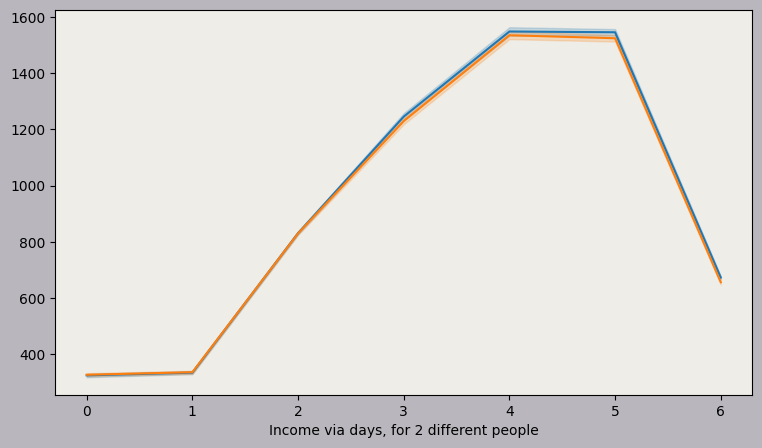

In [298]:
fig, ax = plt.subplots(figsize=(9, 5), facecolor = '#B9B7BD')
sns.lineplot(df[df['shift'] == 0], x = 'day_of_week', y = 'inc_after')
sns.lineplot(df[df['shift'] == 1], x = 'day_of_week', y = 'inc_after')
ax.set_facecolor("#EEEDE7")
ax.set_xlabel('Income via days, for 2 different people')
ax.set_ylabel('')

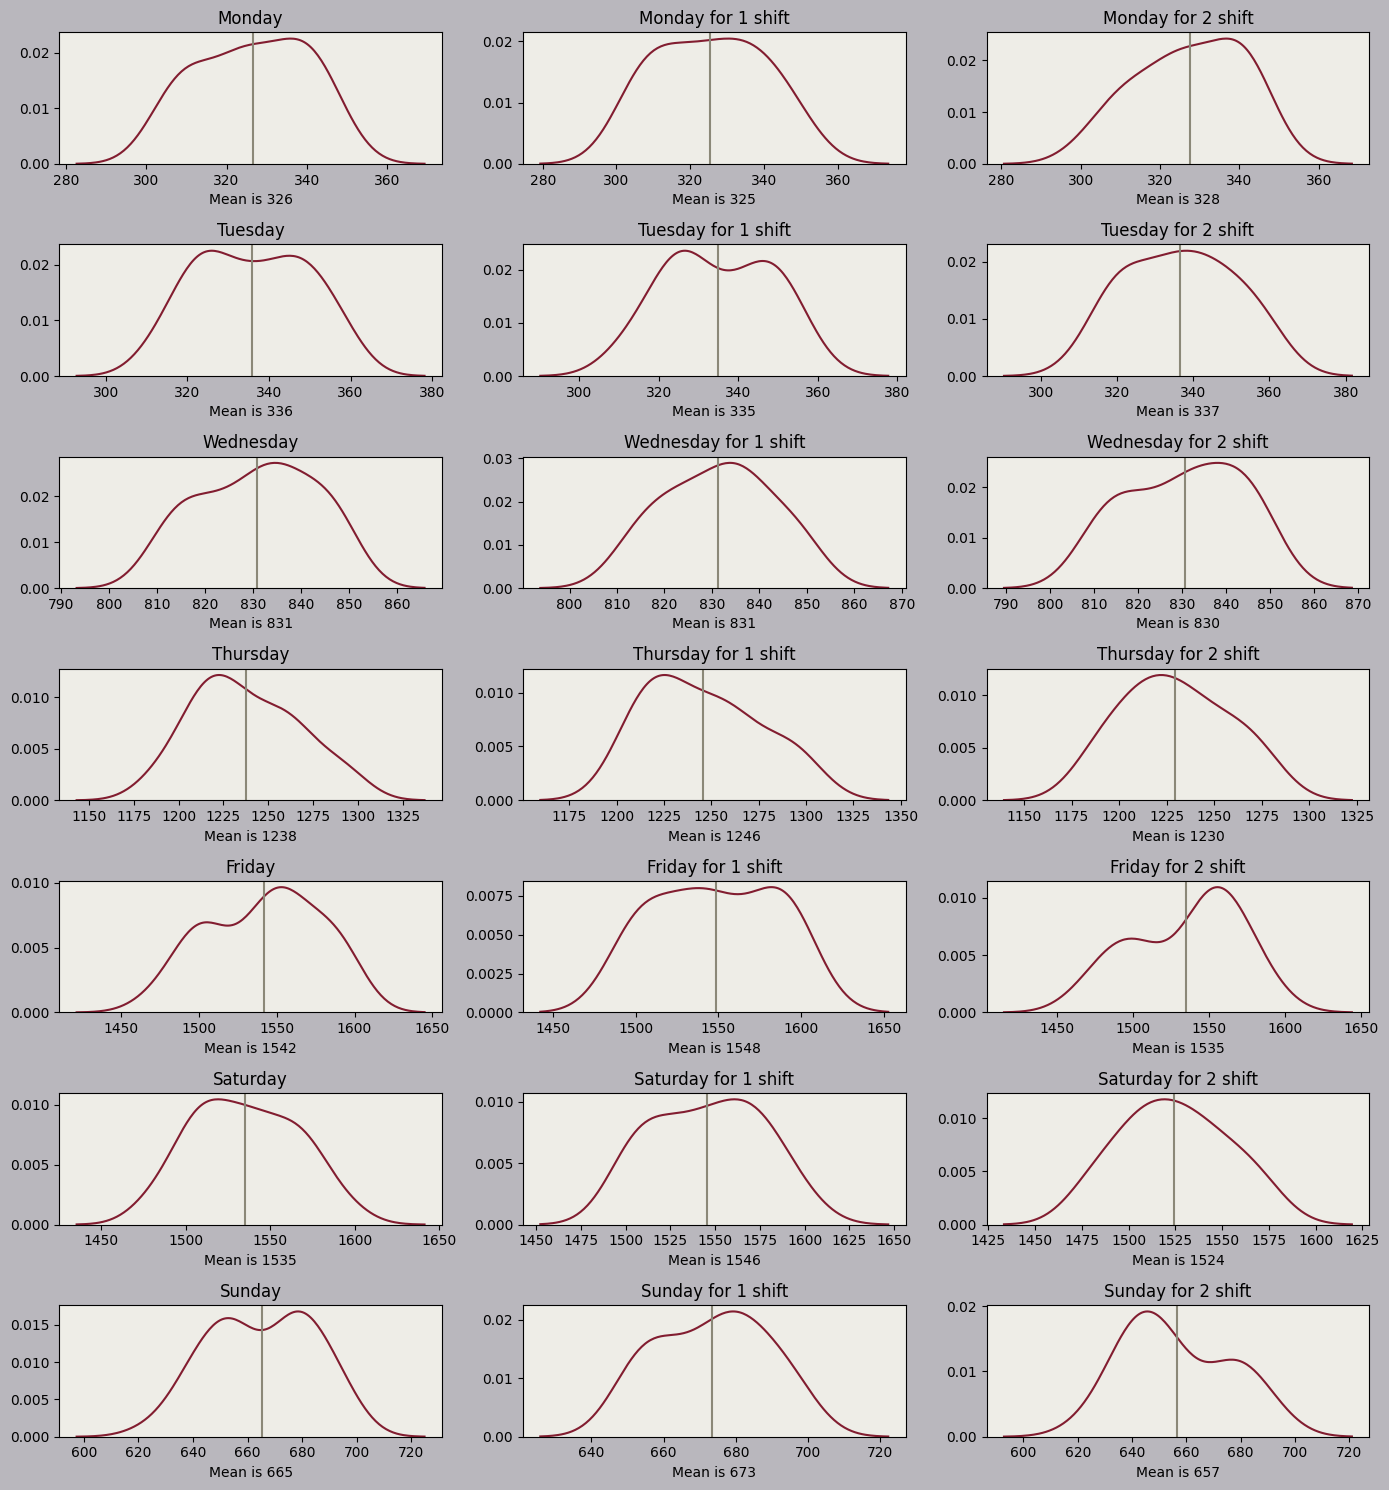

In [299]:
days_of_week_dict = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',
                    3: 'Thursday',4: 'Friday',5: 'Saturday', 6: 'Sunday'}

fig, ax = plt.subplots(7,3,figsize=(14, 15), facecolor = '#B9B7BD')
for i in range(7):
    sns.kdeplot(df[df['day_of_week']==i]['inc_after'],ax = ax[i,0],color = '#821D30')
    ax[i,0].axvline(x = df[df['day_of_week']==i]['inc_after'].mean(), c = '#8B8878')
    ax[i,0].set_facecolor("#EEEDE7")
    ax[i,0].set_title('{}'.format(days_of_week_dict[i]))
    ax[i,0].set_xlabel('Mean is {}'.format(round(df[df['day_of_week']==i]['inc_after'].mean()), 2))
    ax[i,0].set_ylabel('')
    
    sns.kdeplot(df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'],ax = ax[i,1],color = '#821D30')
    ax[i,1].axvline(x = df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'].mean(), c = '#8B8878')
    ax[i,1].set_facecolor("#EEEDE7")
    ax[i,1].set_title('{} for 1 shift'.format(days_of_week_dict[i]))
    ax[i,1].set_xlabel('Mean is {}'.format(round(df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'].mean()), 2))
    ax[i,1].set_ylabel('')
    
    sns.kdeplot(df[(df['day_of_week']==i) & (df['shift'] == 1)]['inc_after'],ax = ax[i,2],color = '#821D30')
    ax[i,2].axvline(x = df[(df['day_of_week']==i) & (df['shift'] == 1)]['inc_after'].mean(), c = '#8B8878')
    ax[i,2].set_facecolor("#EEEDE7")
    ax[i,2].set_title('{} for 2 shift'.format(days_of_week_dict[i]))
    ax[i,2].set_xlabel('Mean is {}'.format(round(df[(df['day_of_week']==i) & (df['shift'] == 1)]['inc_after'].mean()), 2))
    ax[i,2].set_ylabel('')
    plt.tight_layout()

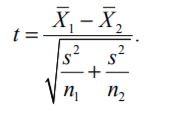 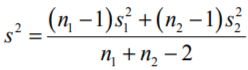

In [300]:
for i in range(7):
    x_1, x_2 = round(df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'].mean(), 2), \
        round(df[(df['day_of_week']==i) & (df['shift'] == 1)]['inc_after'].mean(), 2)
        
    len_1, len_2 = round(df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'].count()), \
        round(df[(df['day_of_week']==0) & (df['shift'] == 1)]['inc_after'].count())
        
    s_1, s_2 = round(df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'].var(), 2), \
        round(df[(df['day_of_week']==i) & (df['shift'] == 1)]['inc_after'].var(), 2)
        
    ddof = len_1 + len_2 - 2       
    s_sum = ((len_1 -1) * s_1 + (len_2 - 1) * s_2)/ ddof
    
    t = round((x_1 - x_2)/( (s_sum/len_1 + s_sum/len_2)** 0.5), 2)
    
    
    fi = round((30/ (s_sum**0.5)) * ((len_1/4)**0.5),2)
    
    print('--' * 30)
    print("t - Student's criterion is {}, degree of freedom is {}, critical t with 0.05 is 1.68 for {}".format(t,ddof,days_of_week_dict[i] ))
    print('φ -- {}'.format(fi))
    

------------------------------------------------------------
t - Student's criterion is -0.51, degree of freedom is 41, critical t with 0.05 is 1.68 for Monday
φ -- 4.96
------------------------------------------------------------
t - Student's criterion is -0.37, degree of freedom is 41, critical t with 0.05 is 1.68 for Tuesday
φ -- 5.03
------------------------------------------------------------
t - Student's criterion is 0.23, degree of freedom is 42, critical t with 0.05 is 1.68 for Wednesday
φ -- 5.87
------------------------------------------------------------
t - Student's criterion is 1.86, degree of freedom is 42, critical t with 0.05 is 1.68 for Thursday
φ -- 2.47
------------------------------------------------------------
t - Student's criterion is 1.27, degree of freedom is 42, critical t with 0.05 is 1.68 for Friday
φ -- 2.0
------------------------------------------------------------
t - Student's criterion is 2.41, degree of freedom is 42, critical t with 0.05 is 1.68 

In [301]:
for i in range(7):
    t_statistic, p_value = ttest_ind(df[(df['day_of_week']==i) & (df['shift'] == 0)]['inc_after'], \
        df[(df['day_of_week']==i) & (df['shift'] == 1)]['inc_after'])
    print('---' * 30)
    print("T-statistic: {}, p-value: {} for {}".format(round(t_statistic, 2), round(p_value, 2), days_of_week_dict[i] ))
    if p_value < 0.05:
        print("Reject the null hypothesis")
    else:
        print("Accept the null hypothesis")
    


------------------------------------------------------------------------------------------
T-statistic: -0.51, p-value: 0.61 for Monday
Accept the null hypothesis
------------------------------------------------------------------------------------------
T-statistic: -0.37, p-value: 0.71 for Tuesday
Accept the null hypothesis
------------------------------------------------------------------------------------------
T-statistic: 0.23, p-value: 0.82 for Wednesday
Accept the null hypothesis
------------------------------------------------------------------------------------------
T-statistic: 1.86, p-value: 0.07 for Thursday
Accept the null hypothesis
------------------------------------------------------------------------------------------
T-statistic: 1.27, p-value: 0.21 for Friday
Accept the null hypothesis
------------------------------------------------------------------------------------------
T-statistic: 2.41, p-value: 0.02 for Saturday
Reject the null hypothesis
------------------